# CSE 6367 Programming Assignment 3 (P3)

## Spring 2023

## Eigenfaces

### Task 1 (30 points)
1. Load all the 25 images in the "\Eigenfaces\Train"
2. Display all the original faces in a 5X5 grid. Resize the images to 100X100 pixels for display only.
3. Find the mean face image. Perform PCA on the training faces.
4. Display the mean face. Resize the mean face to 100X100 pixels for display only
5. Diplay all the eigenfaces in a 5X5 grid.

Original faces:


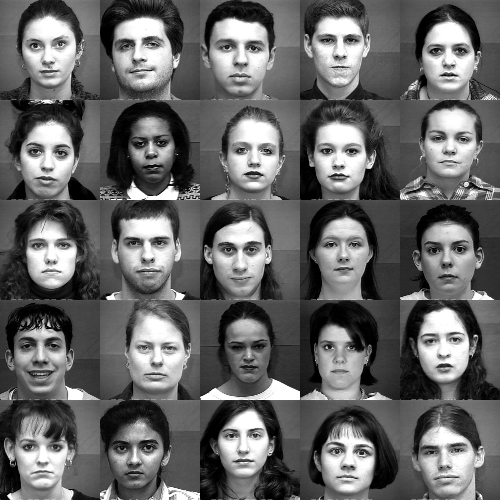

Mean face:


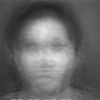

Eigenfaces:


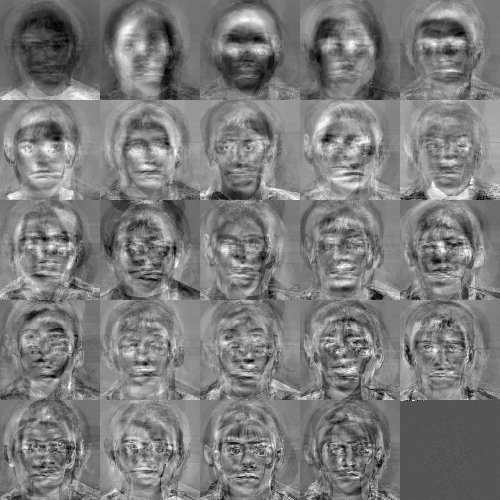

In [1]:
# Task 1 (30 points)

import os
import cv2
import numpy as np
from IPython.display import HTML
from sklearn.decomposition import PCA
from google.colab.patches import cv2_imshow

# 1. Load all the 25 images in the "\Eigenfaces\Train"
train_folder = "./Eigenfaces/Train"
train_data = list(cv2.imread(os.path.join(train_folder, image_file), cv2.IMREAD_GRAYSCALE) for image_file in os.listdir(train_folder))

# 2. Display all the original faces in a 5X5 grid. Resize the images 100X100 pixels for display only.
image_size, off = (100, 100), 5
train_data = list(cv2.resize(image, image_size) for image in train_data) # Resize
grid = np.vstack([np.hstack(train_data[i*off: (i + 1)*off]) for i in range(off)]) # Grid
print("Original faces:")
cv2_imshow(grid) # Display grid

# 3. Find the mean face image. Perform PCA on the training faces.
train_data_flat = list(image.flatten() for image in train_data) # Flatten train data
N = len(train_data_flat) # No. of components for instantiating PCA model
mean_face = np.mean(train_data_flat, axis=0) # Mean Face
pca = PCA(n_components=N) # PCA model
#print("PCA on training faces:")
pca.fit(train_data_flat) # PCA on train flatten data

# 4. Display the mean face. Resize the mean face to 100X100 pixels for display only.
print("Mean face:")
cv2_imshow(mean_face.reshape(image_size))

# 5. Display all the eigenfaces in a 5X5 grid.
eigen_faces = pca.components_.reshape(-1, *image_size)
eigen_faces = np.array([cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U) for image in eigen_faces])
grid = np.vstack([np.hstack(eigen_faces[i*off: (i + 1)*off]) for i in range(off)]) # Grid
print("Eigenfaces:")
cv2_imshow(grid)

### Task 2 (30 points)

1. Select k = 2 eigenfaces (eigenvectors that correspond to the largest eigenvalues).
2. Reconstruct the training faces and display the reconstructed faces in a 5X5 grid.
3. Repeat the process for k = 5 and k = 15. For each k, reconstruct the training faces and display the reconstructed image in a 5X5 grid.


 Reconstructed faces for k = 2:


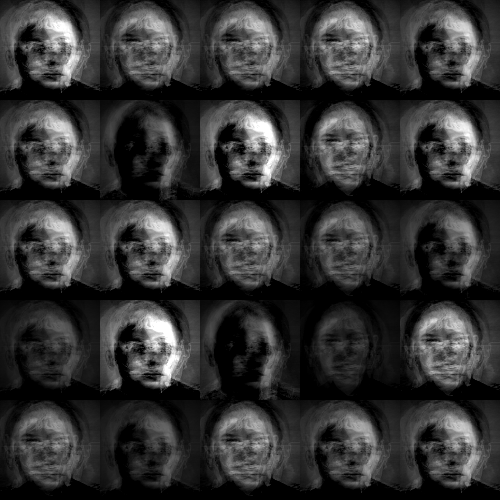


 Reconstructed faces for k = 5:


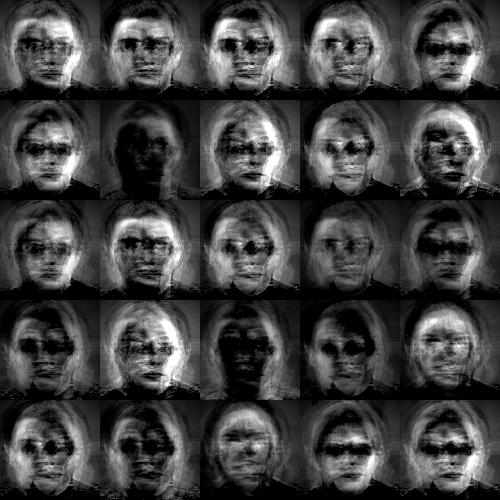


 Reconstructed faces for k = 15:


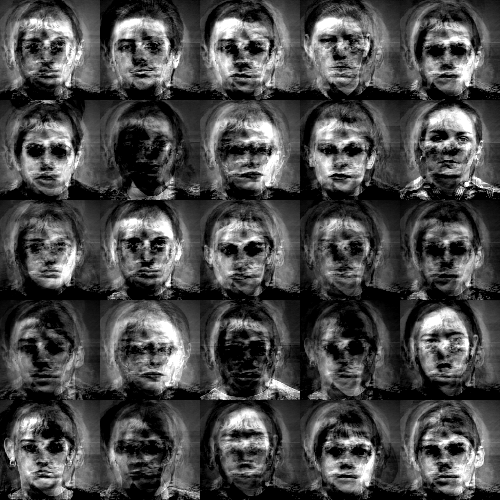

In [2]:
# Task 2 (30 points)

# 1. Select k = 2 eigenfaces (eigenvectors that correspond to the largest eigenvalues).
k = 2
pca = PCA(n_components=k)
pca.fit(train_data_flat)
eigenfaces = pca.components_
eigenfaces_k2 = eigenfaces[:k]

# 2. Reconstruct the training faces and display the reconstructed faces in a 5X5 grid.
off = 5
recon_images = np.array([np.dot(eigenfaces_k2.T, np.dot(eigenfaces_k2, image.reshape(-1, 1))).reshape(image.shape) for image in train_data])
grid = np.vstack([np.hstack(recon_images[i*off: (i + 1)*off]) for i in range(off)]) # Grid
print("\n", f"Reconstructed faces for k = {k}:")
cv2_imshow(grid)

# 3. Repeat the process for k = 5 and k = 15. For each k, reconstruct the training faces and display the reconstructed image in a 5X5 grid.
for k in [5, 15]:
  pca = PCA(n_components=k)
  pca.fit(train_data_flat)
  eigenfaces = pca.components_
  eigenfaces_k = eigenfaces[:k]
  recon_images = np.array([np.dot(eigenfaces_k.T, np.dot(eigenfaces_k, image.reshape(-1, 1))).reshape(image.shape) for image in train_data])
  grid = np.vstack([np.hstack(recon_images[i*off: (i + 1)*off]) for i in range(off)]) # Grid
  print("\n", f"Reconstructed faces for k = {k}:")
  cv2_imshow(grid)

### Task 3 (40 points)
1. Load all the test images from "\Eigenfaces\Test"
2. Project each image on the k = 2 eigenvectors and find if it's a face. If it's a face, find it's closest training image. Use euclidean distance to calculate distance.
3. Display all the results in an M X 2 table, where M is total no of test images. Each row of the table displays two images. The image on the left is the test image. The image on the right is it's closest image in the eigenfaces space. If an image is classified as a non-face, then the second column in the table should be blank.
4. Repeat the process and display the results for k = 5, k = 15.


 Table for k = 2: match(Test, Train)


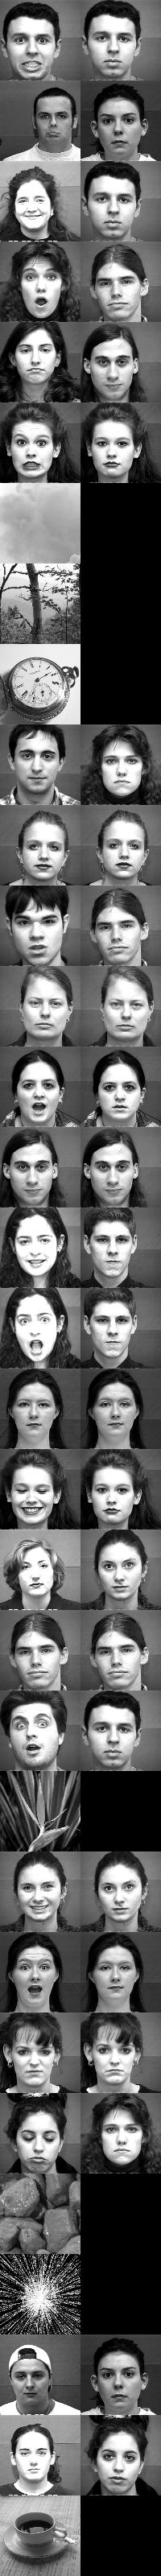


 Table for k = 5: match(Test, Train)


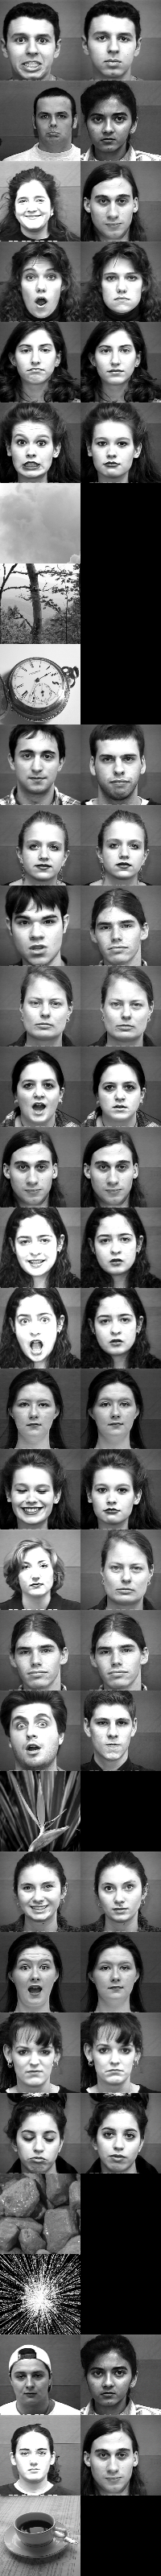


 Table for k = 15: match(Test, Train)


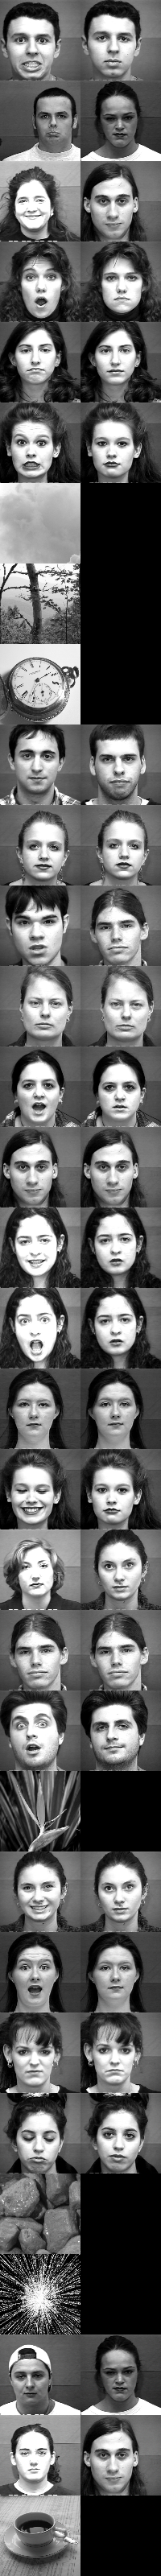

In [9]:
# Task 3 (40 points)

from PIL import Image

# 1. Load all the test images from "\Eigenfaces\Test".
test_folder = "./Eigenfaces/Test"
test_data = list(cv2.imread(os.path.join(test_folder, image_file), cv2.IMREAD_GRAYSCALE) for image_file in os.listdir(test_folder))

# 2. Project each image on the k = 2 eigenvectors and find if it's a face. If it's a face, find it's closest training image. Use euclidean distance to calculate distance.
test_data = list(cv2.resize(image, image_size) for image in test_data)
test_data_flat = np.array([image.flatten() for image in test_data])

faces = list(Image.open(os.path.join(test_folder, image_file)).mode == 'L' for image_file in os.listdir(test_folder))

k = 2
pca = PCA(n_components=k)
train_images = pca.fit_transform(train_data_flat)
test_images = pca.transform(test_data_flat)

closest_images = np.array([train_data[np.argmin(np.linalg.norm(train_images - image, axis=1))] for image in test_images])
closest_images = np.array([cv2.resize(image, image_size) if faces[i] else np.zeros(cv2.resize(image, image_size).shape) for i, image in enumerate(closest_images)])

# 3. Display all the results in an M X 2 table, where M is total no of test images. Each row of the table displays two images. The image on the left is the test image. The image on the right is it's closest image in the eigenfaces space. If an image is classified as a non-face, then the second column in the table should be blank.
table = np.vstack([np.hstack(match_entry) for match_entry in zip(test_data, closest_images)])
print("\n", f"Table for k = {k}: match(Test, Train)")
cv2_imshow(table)

# 4. Repeat the process and display the results for k = 5, k = 15.
for k in [5, 15]:
  pca = PCA(n_components=k)
  train_images = pca.fit_transform(train_data_flat)
  test_images = pca.transform(test_data_flat)

  closest_images = np.array([train_data[np.argmin(np.linalg.norm(train_images - image, axis=1))] for image in test_images])
  closest_images = np.array([cv2.resize(image, image_size) if faces[i] else np.zeros(cv2.resize(image, image_size).shape)  for i, image in enumerate(closest_images)])
  table = np.vstack([np.hstack(match_entry) for match_entry in zip(test_data, closest_images)])
  print("\n", f"Table for k = {k}: match(Test, Train)")
  cv2_imshow(table)


Assignment Courtesy: Prof. Farhad Kamangar, CSE@UTA